In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].apply(lambda x: data.target_names[x])


In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
print("---------------DF INFO-------------------")
df.info()

print("---------------DF DESCRIBE-------------------")
df.describe()

---------------DF INFO-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
---------------DF DESCRIBE-------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Contar las especies
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


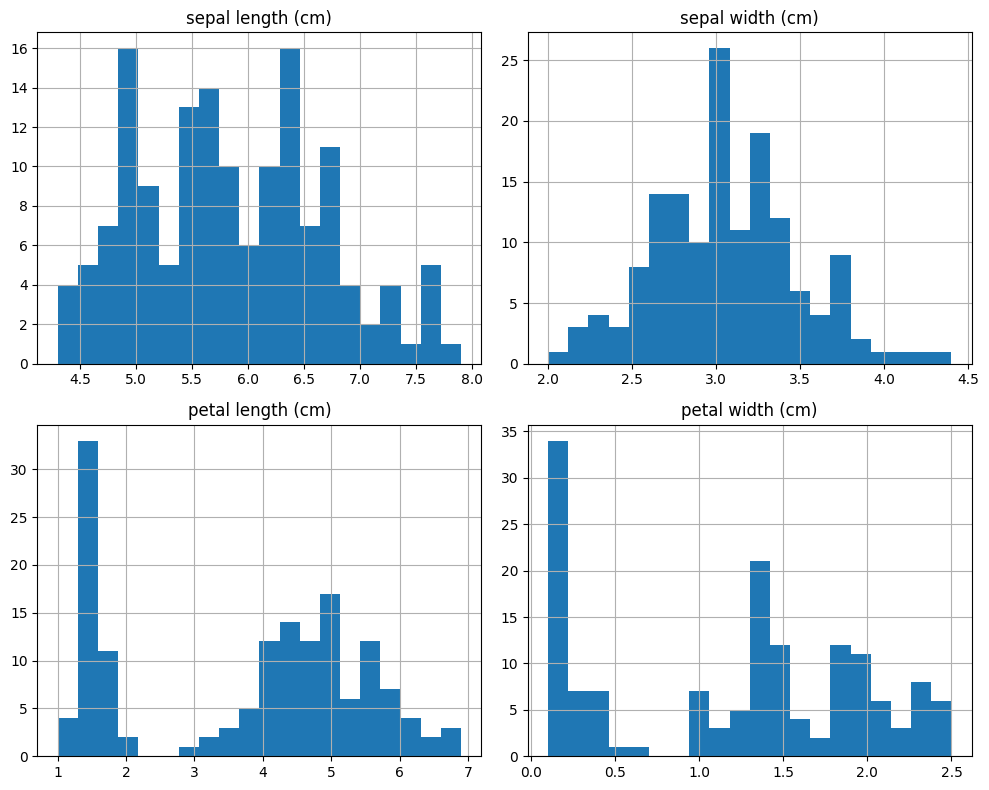

In [18]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

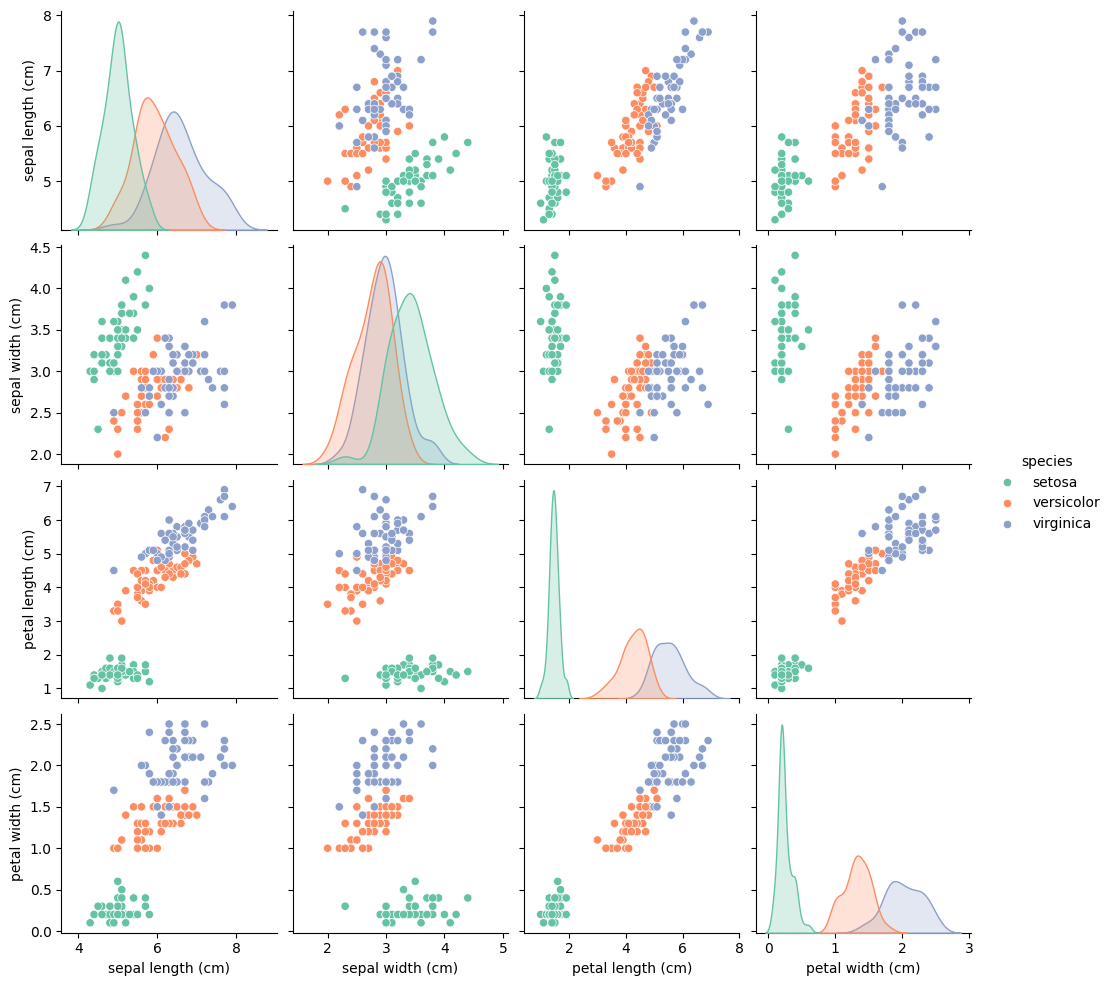

In [19]:
sns.pairplot(df, hue="species", diag_kind="kde", palette="Set2")
plt.show()

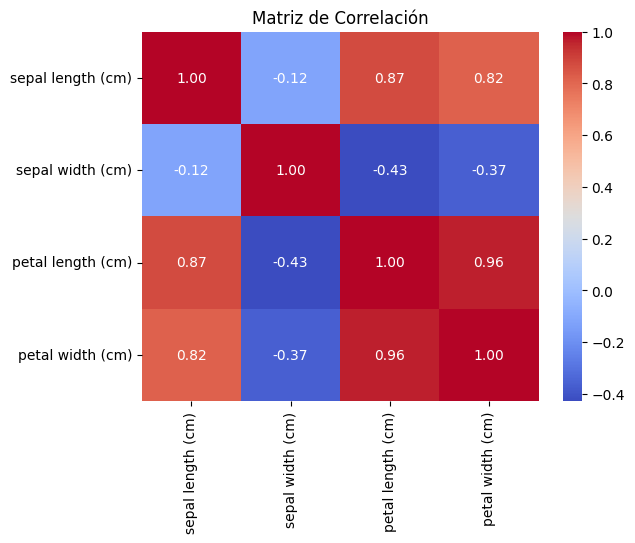

In [20]:
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

/tmp/ipykernel_5753/3544127169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set3')


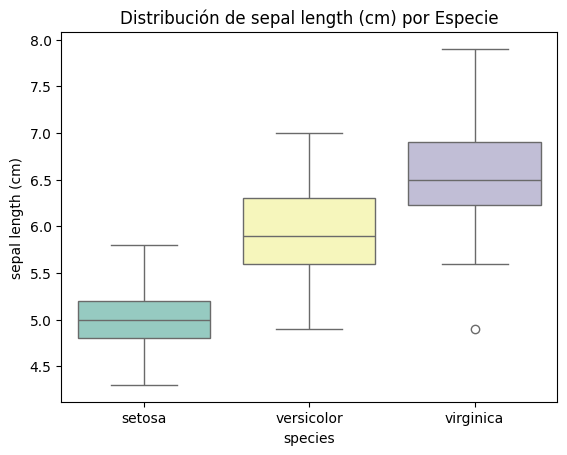

/tmp/ipykernel_5753/3544127169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set3')


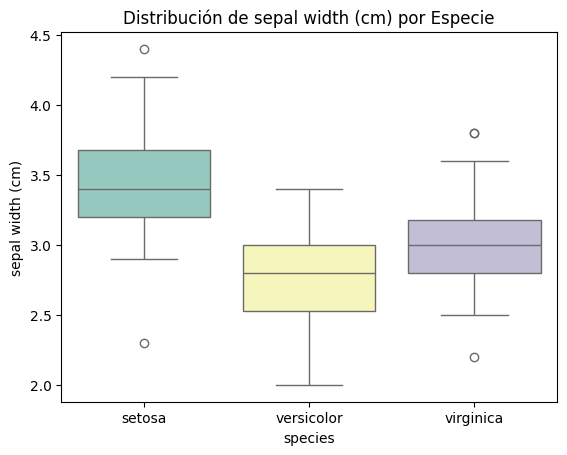

/tmp/ipykernel_5753/3544127169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set3')


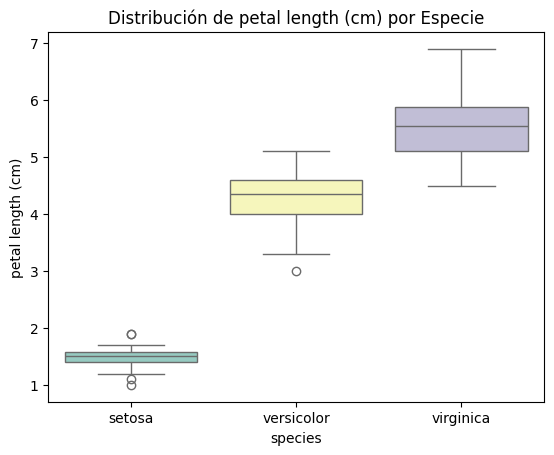

/tmp/ipykernel_5753/3544127169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set3')


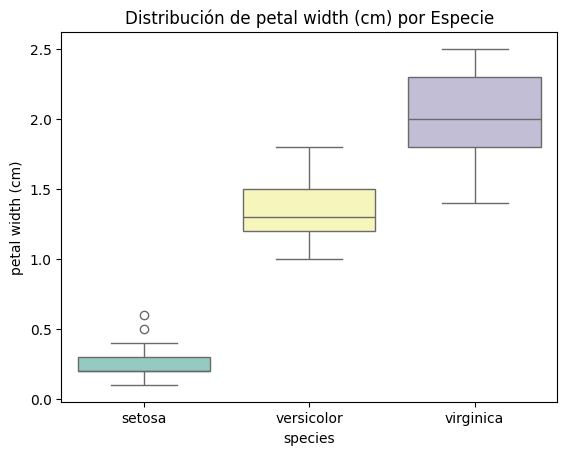

In [21]:
for feature in data.feature_names:
    sns.boxplot(x='species', y=feature, data=df, palette='Set3')
    plt.title(f'Distribución de {feature} por Especie')
    plt.show()

# Tarea 2
## 1)
¿Cuáles son los métodos más comunes de selección de características no 
supervisadas y en qué situaciones son especialmente efectivos?

**R/** La selección de características no supervisadas son muy útiles couando tenemos datos sin etiquetado. Se utiliza para reducir la dimensionalidad de los datos.

Existen varios métodos


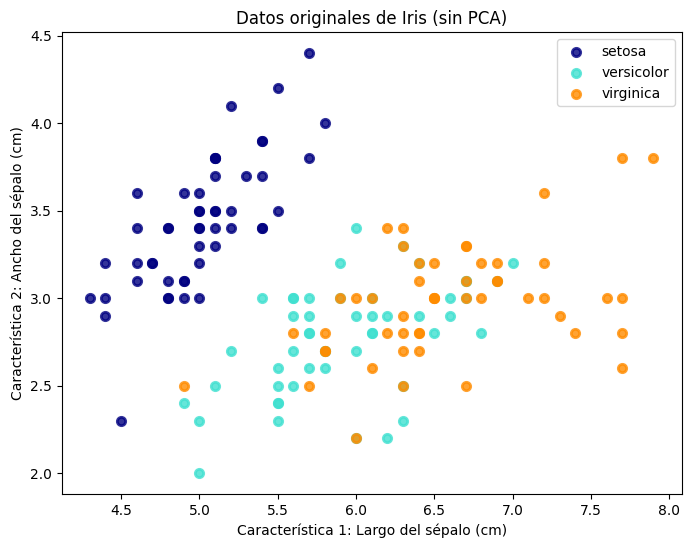

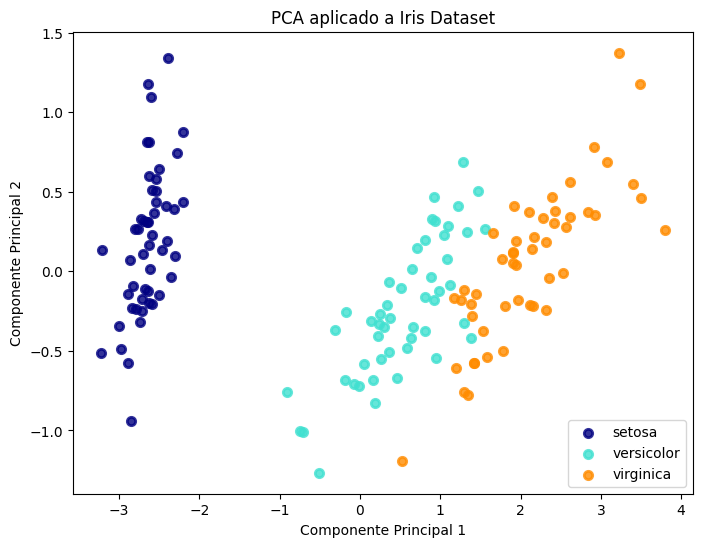

In [ ]:
# 1. Análisis de Componentes Principales(PCA)
"""
Descripción: Reduce la dimensionalidad al transformar las características originales en un conjunto de componentes principales, 
que son combinaciones lineales de las características originales y maximizan la varianza.

Cuándo usarlo:
Cuando las características están altamente correlacionadas.
Para reducir dimensionalidad manteniendo la mayor parte de la información.
"""

from sklearn.decomposition import PCA

X = data.data
y = data.target

target_names = data.target_names

# Visualizar los datos usando las primeras dos características originales
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("Datos originales de Iris (sin PCA)")
plt.xlabel("Característica 1: Largo del sépalo (cm)")
plt.ylabel("Característica 2: Ancho del sépalo (cm)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los datos reducidos
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("PCA aplicado a Iris Dataset")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

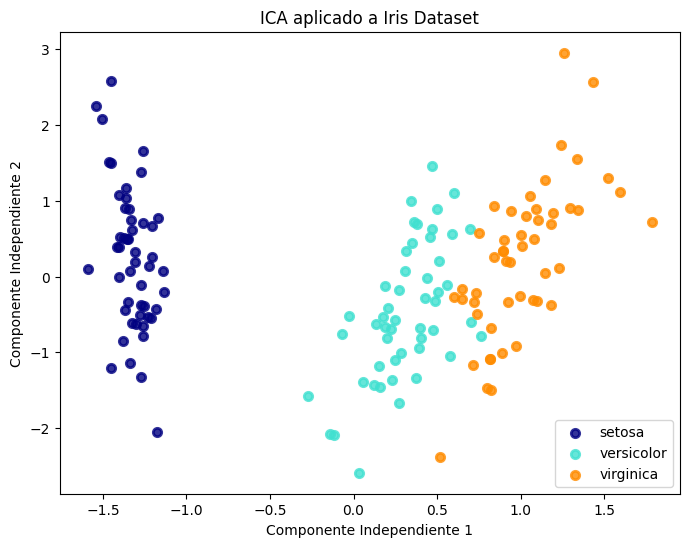

In [5]:
# 2. Análisis de Componentes Independientes (ICA)

"""
Descripción: Busca componentes estadísticamente independientes en los datos. Es útil para separar señales superpuestas.
Cuándo usarlo:
En problemas donde las señales tienen fuentes independientes (ej., procesamiento de señales, análisis de imágenes).
"""

from sklearn.decomposition import FastICA

# Aplicar ICA para reducir a 2 dimensiones
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# Visualizar los datos reducidos
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("ICA aplicado a Iris Dataset")
plt.xlabel("Componente Independiente 1")
plt.ylabel("Componente Independiente 2")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

Características originales: 4
Características seleccionadas: 3


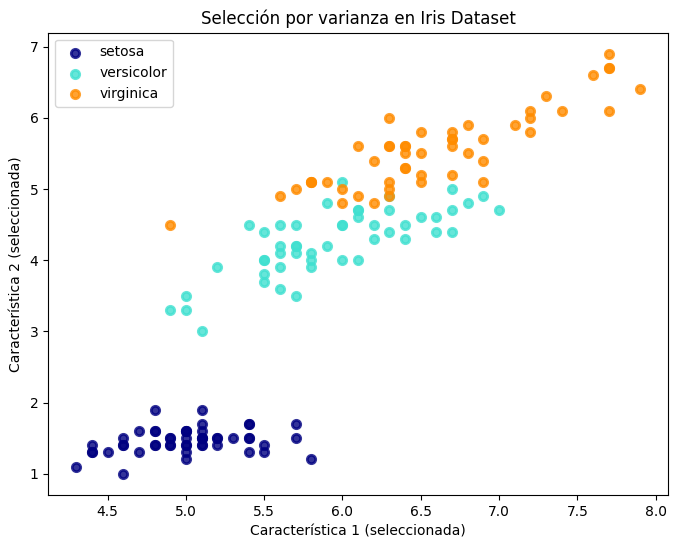

In [6]:
# 3. Varianza de las características
"""
Descripción: Elimina características con baja varianza, ya que estas suelen contener poca información relevante.
Cuándo usarlo:
Cuando se tienen características con escalas similares y se sospecha que algunas son casi constantes."""

from sklearn.feature_selection import VarianceThreshold

# Aplicar umbral de varianza
selector = VarianceThreshold(threshold=0.2)  # Eliminar características con varianza < 0.2
X_var = selector.fit_transform(X)

# Comprobamos las características seleccionadas
print(f"Características originales: {X.shape[1]}")
print(f"Características seleccionadas: {X_var.shape[1]}")

# Visualización de las dos primeras características seleccionadas
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_var[y == i, 0], X_var[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("Selección por varianza en Iris Dataset")
plt.xlabel("Característica 1 (seleccionada)")
plt.ylabel("Característica 2 (seleccionada)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

Matriz de correlación:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.117570           0.871754   
sepal width (cm)            0.117570          1.000000           0.428440   
petal length (cm)           0.871754          0.428440           1.000000   
petal width (cm)            0.817941          0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)           0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Características eliminadas por alta correlación: ['petal width (cm)']


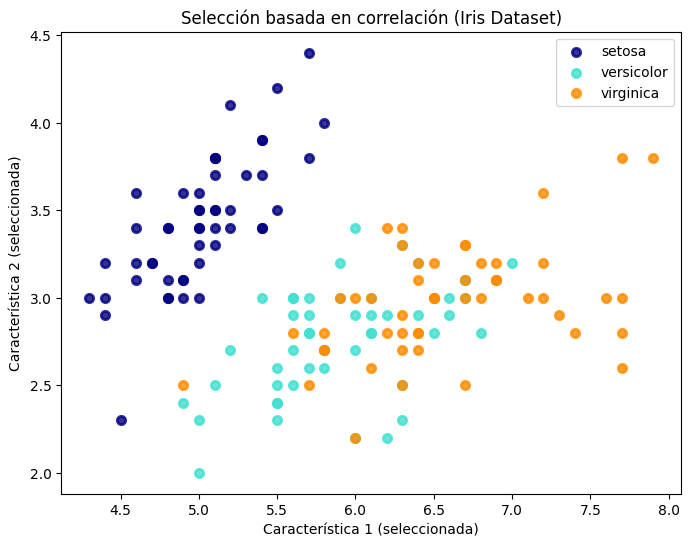

In [10]:
# 4. Correlación entre características
"""
Descripción: Identifica pares de características altamente correlacionadas y elimina una de cada par para evitar redundancia.
Cuándo usarlo:
Cuando se trabaja con datos altamente correlacionados y se desea simplificar el modelo."""

feature_names = data.feature_names

# Convertir a un DataFrame para facilidad de análisis
df = pd.DataFrame(X, columns=feature_names)

# Calcular la matriz de correlación
correlation_matrix = df.corr().abs()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Selección basada en un umbral de correlación
threshold = 0.9
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identificar características con alta correlación
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f"Características eliminadas por alta correlación: {to_drop}")

# Filtrar las características
X_corr = df.drop(columns=to_drop).values

# Visualización con las dos primeras características seleccionadas
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_corr[y == i, 0], X_corr[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("Selección basada en correlación (Iris Dataset)")
plt.xlabel("Característica 1 (seleccionada)")
plt.ylabel("Característica 2 (seleccionada)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()